In [1]:
# python -m ipykernel install --user --name=dl_work_mod
import numpy as np
import pandas as pd
import time
import os
import tensorflow as tf
tf.config.run_functions_eagerly(False)
from VaDER.vader import VADER
from sklearn import preprocessing

save_path = os.path.join('test_vader', 'vader.ckpt')

np.random.seed(123)

In [9]:
from sklearn import preprocessing

X = np.load(r'C:\Projects\TAU\DL-Workshop\Git Folder\DL-WORKSHOP\npy_files\features_All25.npy')
y = np.load(r'C:\Projects\TAU\DL-Workshop\Git Folder\DL-WORKSHOP\npy_files\labels_All25.npy')
le = preprocessing.LabelEncoder()
labs = le.fit_transform(y)
print(len(X),len(y))
X_train, y_train = X, labs

1878 1878


In [10]:
pd.Series(y).value_counts()

G4     286
F4     254
D7     210
D4     198
D3     195
D2     153
G2     136
E6     118
F3      78
F2      54
G5      44
G6      43
G3      38
E7      35
E8      26
E9       6
E10      4
dtype: int64

In [11]:
# normalize (better for fitting)
for i in np.arange(X_train.shape[2]):
    X_train[:,:,i] = (X_train[:,:,i] - np.mean(X_train[:,:,i])) / np.std(X_train[:,:,i])

In [20]:
vader = VADER(X_train=X_train, W_train=None, save_path=save_path, n_hidden=[64,32,16], k=3,
              learning_rate=1e-3, output_activation=None, recurrent=True, cell_type="GRU", batch_size=64)
# pre-train without latent loss
start = time.time()
vader.pre_fit(n_epoch=50, verbose=True)
# train with latent loss
vader.fit(n_epoch=50, verbose=True)
end = time.time()
print("Elapsed: ", end - start)

INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


-1 tot_loss: 165.69 	rec_loss: 152.58 	lat_loss: 13.11
1 tot_loss: 144.30 	rec_loss: 144.30 	lat_loss: 12.08
2 tot_loss: 127.76 	rec_loss: 127.76 	lat_loss: 30.79
3 tot_loss: 114.00 	rec_loss: 114.00 	lat_loss: 37.53
4 tot_loss: 118.61 	rec_loss: 118.61 	lat_loss: 33.05
5 tot_loss: 95.96 	rec_loss: 95.96 	lat_loss: 53.08
6 tot_loss: 86.17 	rec_loss: 86.17 	lat_loss: 63.93
7 tot_loss: 76.61 	rec_loss: 76.61 	lat_loss: 71.66
8 tot_loss: 74.16 	rec_loss: 74.16 	lat_loss: 89.47
9 tot_loss: 66.33 	rec_loss: 66.33 	lat_loss: 113.85
10 tot_loss: 63.39 	rec_loss: 63.39 	lat_loss: 124.57
11 tot_loss: 68.01 	rec_loss: 68.01 	lat_loss: 139.29
12 tot_loss: 68.45 	rec_loss: 68.45 	lat_loss: 156.57
13 tot_loss: 70.37 	rec_loss: 70.37 	lat_loss: 155.11
14 tot_loss: 70.17 	rec_loss: 70.17 	lat_loss: 150.12
15 tot_loss: 69.16 	rec_loss: 69.16 	lat_loss: 150.56
16 tot_loss: 61.37 	rec_loss: 61.37 	lat_loss: 160.76
17 tot_loss: 67.57 	rec_loss: 67.57 	lat_loss: 168.39
18 tot_loss: 61.39 	rec_loss: 61.39 

INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


-1 tot_loss: 55.91 	rec_loss: 55.91 	lat_loss: 210.93


c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("PartitionedCall_3:4", shape=(384,), dtype=int32), values=Tensor("PartitionedCall_3:3", shape=(384, 16), dtype=float32), dense_shape=Tensor("PartitionedCall_3:5", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("PartitionedCall_3:1", shape=(192,), dtype=int32), values=Tensor("PartitionedCall_3:0", shape=(192, 16), dtype=float32), dense_shape=Tensor("PartitionedCall_3:2", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
c:\Projects\TAU\DL-Workshop\Git 

51 tot_loss: 68.55 	rec_loss: 57.54 	lat_loss: 11.01
52 tot_loss: 73.01 	rec_loss: 61.78 	lat_loss: 11.23
53 tot_loss: 67.26 	rec_loss: 55.64 	lat_loss: 11.63
54 tot_loss: 70.21 	rec_loss: 59.01 	lat_loss: 11.20
55 tot_loss: 68.01 	rec_loss: 57.53 	lat_loss: 10.48
56 tot_loss: 67.05 	rec_loss: 56.81 	lat_loss: 10.24
57 tot_loss: 69.28 	rec_loss: 58.56 	lat_loss: 10.72
58 tot_loss: 67.46 	rec_loss: 57.01 	lat_loss: 10.45
59 tot_loss: 70.01 	rec_loss: 59.65 	lat_loss: 10.36
60 tot_loss: 69.85 	rec_loss: 59.39 	lat_loss: 10.46
61 tot_loss: 70.32 	rec_loss: 59.93 	lat_loss: 10.39
62 tot_loss: 68.36 	rec_loss: 57.98 	lat_loss: 10.37
63 tot_loss: 64.77 	rec_loss: 54.66 	lat_loss: 10.12
64 tot_loss: 70.70 	rec_loss: 60.84 	lat_loss: 9.86
65 tot_loss: 66.23 	rec_loss: 56.36 	lat_loss: 9.88
66 tot_loss: 72.76 	rec_loss: 62.11 	lat_loss: 10.65
67 tot_loss: 67.51 	rec_loss: 57.60 	lat_loss: 9.92
68 tot_loss: 62.77 	rec_loss: 52.80 	lat_loss: 9.97
69 tot_loss: 67.45 	rec_loss: 57.61 	lat_loss: 9.8

INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


Elapsed:  97.5692789554596


In [21]:
# get the clusters
c = vader.cluster(X_train)
# get the re-constructions
p = vader.predict(X_train)
# compute the loss given the network
l = vader.get_loss(X_train)

In [22]:
print(pd.Series(c).value_counts())

1    1293
0     519
2      66
dtype: int64


In [23]:
latent = vader.map_to_latent(X_train)

In [24]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import numpy as np
from random import randint
import os
import matplotlib.pyplot as plt

def plot_clustering_matplotlib(z_run, labels):

    labels = labels[:z_run.shape[0]] # because of weird batch_size

    hex_colors = []
    for _ in np.unique(labels):
        hex_colors.append('#%06X' % randint(0, 0xFFFFFF))

    colors = [hex_colors[int(i)] for i in labels]

    z_run_pca = TruncatedSVD(n_components=2).fit_transform(z_run)
    z_run_tsne = TSNE(perplexity=80, min_grad_norm=1E-12, n_iter=3000).fit_transform(z_run)

    plt.scatter(z_run_pca[:, 0], z_run_pca[:, 1], c=colors, marker='*', linewidths=0)
    plt.title('PCA on z_run')
    plt.show()

    plt.scatter(z_run_tsne[:, 0], z_run_tsne[:, 1], c=colors, marker='*', linewidths=0)
    plt.title('tSNE on z_run')
    plt.show()

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


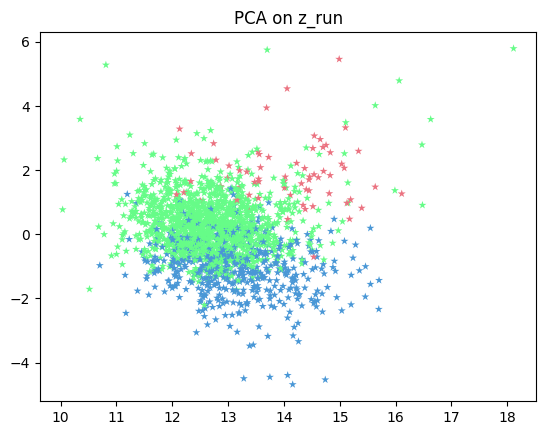

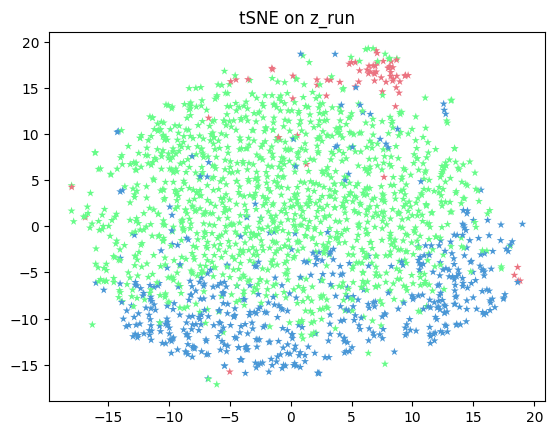

In [25]:
plot_clustering_matplotlib(latent,c)

In [ ]:
import umap

mapper = umap.UMAP().fit(pendigits.data)
